In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code


# Runtime Analysis 
## using *Finding the nth* Fibonacci numbers as a computational object to think with


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import libraries
from __future__ import absolute_import, division, print_function

import math
from time import time
import matplotlib.pyplot as pyplt

## Fibonacci

Fibonacci is most widely known for his famous sequence of numbers

$0,1,1,2,3,5,8,13,21,34,...,$

each the sum of its two immediate predecessors. More formally, the Fibonacci numbers $F_n$ are generated by the simple rule


$F_n = \begin{cases} 
F_n−1 + F_n−2, & \mbox{if } n \mbox{ is} > 1 \\ 
1, & \mbox{if } n \mbox{ is} = 1 \\ 
0, & \mbox{if } n \mbox{ is} = 0
\end{cases}$

No other sequence of numbers has been studied as extensively, or applied to more fields: biology, demography, art, architecture, music, to name just a few. And, together with the powers of 2, it is computer science’s favorite sequence.



### Tree Recursion
A very simple way to calculate the *nth* Fibonacci number is to use a **recursive** algorithm. Here is a **recursive** algorithm for computing the *n*th Fibonacci number.
```python
def fib(n):
    if n == 0 or n == 1:
        return n
    else:
        return fib(n-2) + fib(n-1)
    
<pre><code>

This algorithm in particular is done using tree recursion. 




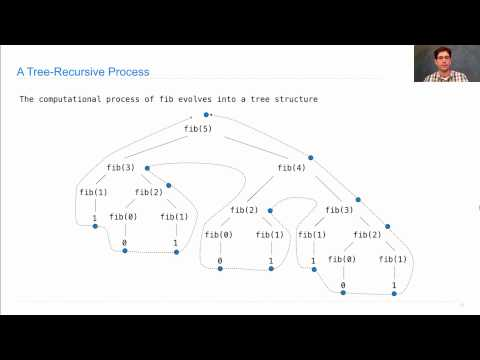

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('ls0GsJyLVLw')

In [3]:
def fib(n):
    if n == 0 or n == 1:
        return n
    else:
        return fib(n-2) + fib(n-1)
    

In [4]:
fib(5)

5

Let $T(n)$ be the number of computer steps needed to compute $fib(n)$; what can we say about this function? For starters, if $n$ is less than 2, the procedure halts almost immediately, after just a couple of steps. Therefore,

$T(n)≤2$ for $n≤1$.

For larger values of $n$, there are two recursive invocations of $fib$, taking time $T (n − 1)$ and $T(n−2)$, respectively, plus three computer steps (checks on the value of $n$ and a final addition).
Therefore,

$T(n) = T(n−1) + T(n−2)+3$ for $n>1$.

Compare this to the recurrence relation for $F_n$: we immediately see that $T(n) ≥ F_n$.
This is very bad news: the running time of the algorithm grows as fast as the Fibonacci numbers! $T(n)$ is exponential in $n$, which implies that the algorithm is impractically slow except for very small values of $n$.

Let’s be a little more concrete about **just how bad exponential time is**. To compute $F_{200}$,
the $fib$ algorithm executes $T (200) ≥ F_{200} ≥ 2^{138}$ elementary computer steps. How long this actually takes depends, of course, on the computer used. At this time, the fastest computer in the world is the NEC Earth Simulator, which clocks 40 trillion steps per second. Even on this machine, $fib(200)$ would take at least $2^{92}$ seconds. This means that, if we start the computation today, it would still be going long after the sun turns into a red giant star.

In [5]:
# This function provides a way to track function calls

def count(f):
    def counted(n):
        counted.call_count += 1
        return f(n)
    counted.call_count = 0
    return counted

In [6]:
fib = count(fib)


In [7]:
t0 = time()

n = 5
fib(n)

print ('This recursive implementation of fib(', n, ') took', round(time() - t0, 4), 'secs')
print ('And {0} calls to the function'.format(fib.call_count))

This recursive implementation of fib( 5 ) took 0.0003 secs
And 15 calls to the function


In [8]:
t0 = time()

n = 30
fib(n)

print ('This recursive implementation of fib(', n, ') took', round(time() - t0, 4), 'secs')
print ('And {0} calls to the function'.format(fib.call_count))

This recursive implementation of fib( 30 ) took 1.2194 secs
And 2692552 calls to the function


### A polynomial algorithm for $fib$
Let’s try to understand why $fib$ is so slow. `fib.call_count` shows the count of recursive invocations triggered by a single call to $fib(5)$, which is 15. If you sketched it out, you will notice that many computations are repeated!
A more sensible scheme would store the intermediate results—the values $F_0 , F_1 , . . . , F_{n−1}$ as soon as they become known. 

Lets do exactly that through **memoization**. Note that you can also do this by writing a polynomial algorithm.


### Memoization
Tree-recursive computational processes can often be made more efficient through memoization, a powerful technique for increasing the efficiency of recursive functions that repeat computation. A memoized function will store the return value for any arguments it has previously received. A second call to `fib(30)` would not re-compute the return value recursively, but instead return the existing one that has already been constructed.

Memoization can be expressed naturally as a higher-order function, which can also be used as a decorator. The definition below creates a cache of previously computed results, indexed by the arguments from which they were computed. The use of a dictionary requires that the argument to the memoized function be immutable.

In [38]:
def memo(f):
    cache = {}
    def memoized(n):
        if n not in cache:
            cache[n] = f(n) # Make a mapping between the key "n" and the return value of f(n)
        return cache[n]
    return memoized

In [39]:
fib = memo(fib)

In [41]:
t0 = time()

n = 30
fib(n)

print ('This memoized implementation of fib(', n, ') took', round(time() - t0, 4), 'secs')

This memoized implementation of fib( 30 ) took 0.0002 secs


In [45]:
t0 = time()

n = 300
fib(n)

print ('This memoized implementation of fib(', n, ') took', round(time() - t0, 4), 'secs')

This memoized implementation of fib( 300 ) took 0.0002 secs


In [46]:
# Here is the polynomial algorithm for fibonacci sequence
def fib2(n):
    if n == 0:
        return 0
    
    f = [0] * (n+1) # create an array f[0 . . . n]
    f[0], f[1] = 0, 1
    
    for i in range(2, n+1):
        f[i] = f[i-1] + f[i-2]
        
    return f[n] 

In [47]:
fib2 = count(fib2)

In [52]:
t0 = time()

n = 3000
fib2(n)

print ('This polynomial implementation of fib2(', n, ') took', round(time() - t0, 4), 'secs')

This polynomial implementation of fib2( 3000 ) took 0.0022 secs


In [53]:
fib2.call_count

4

How long does $fib2$ take? 
- The inner loop consists of a single computer step and is executed $n − 1$ times. 
- Therefore the number of computer steps used by $fib2$ is linear in $n$. 

From exponential we are down to polynomial, a huge breakthrough in running time. It is now perfectly reasonable to compute $F_{200}$ or even $F_{200,000}$

In [54]:
fib2(200)

280571172992510140037611932413038677189525L

Instead of reporting that an algorithm takes, say, $ 5n^3 + 4n + 3$ steps on an input of size $n$, it is much simpler to leave out lower-order terms such as $4n$ and $3$ (which become insignificant as $n$ grows), and even the detail of the coefficient $5$ in the leading term (computers will be five times faster in a few years anyway), and just say that the algorithm takes time $O(n^3)$ (pronounced “big oh of $n^3$”).

It is time to define this notation precisely. In what follows, think of $f(n)$ and $g(n)$ as the running times of two algorithms on inputs of size $n$.

> Let $f(n)$ and $g(n)$ be functions from positive integers to positive reals. We say $f = O(g)$ (which means that “$f$ grows no faster than $g$”) if there is a constant $c > 0$ such that 
> ${f(n) ≤ c · g(n)}$.

Saying $f = O(g)$ is a very loose analog of “$f ≤ g$.” It differs from the usual notion of ≤ because of the constant c, so that for instance $10n = O(n)$. This constant also allows us to disregard what happens for small values of $n$. 

### Example:
For example, suppose we are choosing between two algorithms for a particular computational task. One takes $f_1(n) = n^2$ steps, while the other takes $f_2(n) = 2n + 20$ steps. Which is better? Well, this depends on the value of $n$. For $n ≤ 5$, $f_1(n)$ is smaller; thereafter, $f_2$ is the clear winner. In this case, $f_2$ scales much better as $n$ grows, and therefore it is superior.

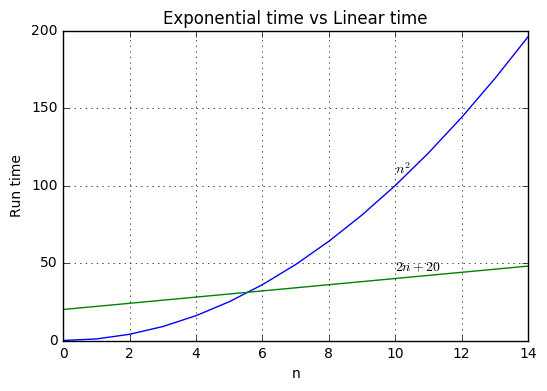

In [82]:
t = arange(0, 15, 1)
f1 = t * t 
f2 = 2*t + 20

pyplt.title('Exponential time vs Linear time')
plot(t, f1, t, f2)
pyplt.annotate('$n^2$', xy=(8, 1), xytext=(10, 108))
pyplt.annotate('$2n + 20$', xy=(5, 1), xytext=(10, 45))
pyplt.xlabel('n')
pyplt.ylabel('Run time')
pyplt.grid(True)




Is there a faster way to compute the nth Fibonacci number than by `fib2`? One idea
involves matrices.
We start by writing the equations $F_1$ = $F_1$ and $F_2$ = $F_0$ + $F_1$ in matrix notation:

$$
\begin{bmatrix} F_1\\F_2 \end{bmatrix} = \begin{bmatrix} 0&1\\ 1&1 \end{bmatrix} \cdot \begin{bmatrix} F_0\\F_1 \end{bmatrix}
$$

similarly,

$$
 \begin{bmatrix} F_2\\F_3 \end{bmatrix} = \begin{bmatrix} 0&1\\ 1&1 \end{bmatrix} \cdot \begin{bmatrix} F_1\\F_2 \end{bmatrix} = \begin{bmatrix} 0&1\\ 1&1 \end{bmatrix}^2 \cdot \begin{bmatrix} F_0\\F_1 \end{bmatrix}
$$

and in general 

$$
\begin{bmatrix} F_n\\F_{n+1} \end{bmatrix} = \begin{bmatrix} 0&1\\ 1&1 \end{bmatrix}^n \cdot \begin{bmatrix} F_0\\F_1 \end{bmatrix}
$$

So, in order to compute $F_n$, it suffices to raise this 2 × 2 matrix, call it $X$, to the nth power.

Thus the number of arithmetic operations needed by our matrix-based algorithm, call it `fib3`, is
just $O(log n)$, as compared to $O(n)$ for `fib2`. Have we broken another exponential barrier?      

The catch is that our new algorithm involves multiplication, not just addition; and multiplications of large numbers are slower than additions. We have already seen that, when the complexity of arithmetic operations is taken into account, the running time of `fib2` becomes $O(n^2)$.

In conclusion, whether `fib3` is faster than `fib2` depends on whether we can multiply n-bit integers faster than $O(n^2)$.
